## Sampling Error and Confidence Intervals

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:

xs = np.linspace(-5,5,1000)

<Figure size 576x432 with 0 Axes>

In [3]:
xs

array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
       -4.94994995, -4.93993994, -4.92992993, -4.91991992, -4.90990991,
       -4.8998999 , -4.88988989, -4.87987988, -4.86986987, -4.85985986,
       -4.84984985, -4.83983984, -4.82982983, -4.81981982, -4.80980981,
       -4.7997998 , -4.78978979, -4.77977978, -4.76976977, -4.75975976,
       -4.74974975, -4.73973974, -4.72972973, -4.71971972, -4.70970971,
       -4.6996997 , -4.68968969, -4.67967968, -4.66966967, -4.65965966,
       -4.64964965, -4.63963964, -4.62962963, -4.61961962, -4.60960961,
       -4.5995996 , -4.58958959, -4.57957958, -4.56956957, -4.55955956,
       -4.54954955, -4.53953954, -4.52952953, -4.51951952, -4.50950951,
       -4.4994995 , -4.48948949, -4.47947948, -4.46946947, -4.45945946,
       -4.44944945, -4.43943944, -4.42942943, -4.41941942, -4.40940941,
       -4.3993994 , -4.38938939, -4.37937938, -4.36936937, -4.35935936,
       -4.34934935, -4.33933934, -4.32932933, -4.31931932, -4.30

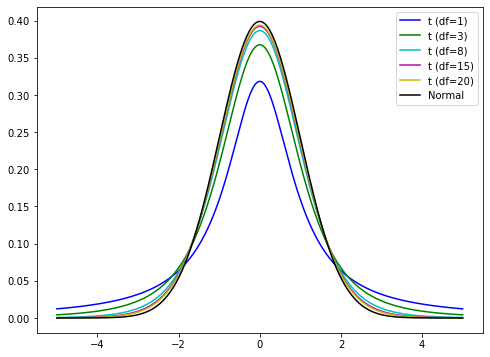

In [11]:
plt.figure(figsize=(8,6))
plt.plot(xs, stats.t.pdf(xs, 1), "b", label="t (df=1)")
plt.plot(xs, stats.t.pdf(xs, 3), "g", label="t (df=3)")
plt.plot(xs, stats.t.pdf(xs, 8), "c", label="t (df=8)")
plt.plot(xs, stats.t.pdf(xs, 15), "m", label="t (df=15)")
plt.plot(xs, stats.t.pdf(xs, 20), "y", label="t (df=20)")
plt.plot(xs, stats.norm.pdf(xs), "k", label="Normal")
plt.legend()
plt.show();

In [14]:
stats.t.pdf(xs, 10)

array([0.000396  , 0.00040228, 0.00040867, 0.00041516, 0.00042176,
       0.00042848, 0.0004353 , 0.00044224, 0.0004493 , 0.00045647,
       0.00046377, 0.00047119, 0.00047873, 0.00048641, 0.00049421,
       0.00050214, 0.00051021, 0.00051841, 0.00052675, 0.00053524,
       0.00054386, 0.00055264, 0.00056156, 0.00057063, 0.00057986,
       0.00058925, 0.00059879, 0.0006085 , 0.00061837, 0.00062841,
       0.00063863, 0.00064901, 0.00065958, 0.00067032, 0.00068125,
       0.00069237, 0.00070368, 0.00071518, 0.00072687, 0.00073877,
       0.00075087, 0.00076318, 0.00077571, 0.00078844, 0.0008014 ,
       0.00081458, 0.00082799, 0.00084163, 0.0008555 , 0.00086961,
       0.00088397, 0.00089857, 0.00091343, 0.00092854, 0.00094392,
       0.00095956, 0.00097548, 0.00099167, 0.00100814, 0.00102489,
       0.00104194, 0.00105928, 0.00107693, 0.00109488, 0.00111314,
       0.00113173, 0.00115063, 0.00116987, 0.00118944, 0.00120935,
       0.00122961, 0.00125022, 0.0012712 , 0.00129254, 0.00131

In [ ]:
stats.norm.pdf(xs)

### Confidence Interval for Population Mean using SciPy

When working with large samples (n≥30), we can assume that the sampling distribution of the sample mean is approximately normally distributed (thanks to the Central Limit Theorem). In this case, we can calculate the confidence interval for the mean using the stats.norm.interval() function in Scipy.

In [ ]:
# Define a sample dataset (exam grades for a class of 40 students):

In [10]:
import numpy as np
from scipy import stats
np.random.seed(42)
grades = np.random.randint(100, size=40)
print(grades)

[51 92 14 71 60 20 82 86 74 74 87 99 23  2 21 52  1 87 29 37  1 63 59 20
 32 75 57 21 88 48 90 58 41 91 59 79 14 61 61 46]


In [11]:
# Calculate the sample mean:
xbar= np.mean(grades)
xbar

53.15

In [14]:
# Calculate standart error of the mean:
# SE (sample error) = population_standart_deviation / sqrt_of_sample_size

n= len(grades)  # sample size
sigma = 28  #population standart deviation (from past experience)

sem = sigma/np.sqrt(n)

print(sem)

4.427188724235731


In [16]:
# Calculate 95% Confidence Interval around the mean by using scipy.stats:
# calculate confidence interval using xbar:sample mean and sem:standart error of the mean

stats.norm.interval(alpha=0.95, loc=xbar, scale=sem)

(44.47286954773614, 61.82713045226386)

### Population Variance Unknown (using t-score)

Where the population standard deviation σ is unknown, the sample standard deviation s is used. This introduces extra uncertainty, as s varies from sample to sample. So, the t distribution is used instead of the normal distribution. In this case, we can calculate the confidence interval for the mean using the stats.t.interval() function in Scipy.

In [ ]:
# Define a sample dataset (exam grades for a class of 20 students):

In [19]:
np.random.seed(101)
grades = np.random.randint(100, size=20)
grades

array([95, 11, 81, 70, 63, 87, 75,  9, 77, 40,  4, 63, 40, 60, 92, 64,  5,
       12, 93, 40])

In [25]:
# Calculate 95% Confidence Interval around the mean by using scipy.stats:

stats.t.interval(alpha=0.95,  # confidence level
                 df=np.size(grades)-1,  # degrees of freedom
                 loc=np.mean(grades),  # sample mean
                 scale=stats.sem(grades)  #standart error of the mean
                )

(39.205382746648176, 68.89461725335181)

In [22]:
scale=np.std(grades)/np.sqrt(len(grades)) ## calculating sample error

6.91284131164603

In [ ]:
# Calculate the standard error of the mean

# stats.sem()